In [1]:
import math

def f(x): 
    return math.cos(x)
def trap_integration(start_x,end_x,interval): 
    value = 0
    for i in range(0, int((end_x-start_x)/interval)):
        start_value = f(start_x + i * interval)
        end_value = f(start_x + i * interval + interval)
        value = value + (start_value + end_value)
    value = value * interval/2
    return value

In [2]:
import numpy as np
import matplotlib.pyplot as plt




num_tri = np.array([2**1,2**2,2**3,2**4,2**5,2**6])
solution = np.zeros(len(num_tri))
for i in range(0,len(num_tri)):
    start = 0
    end = 1
    interval = (end - start)/num_tri[i]
    solution[i] = trap_integration(start,end,interval)






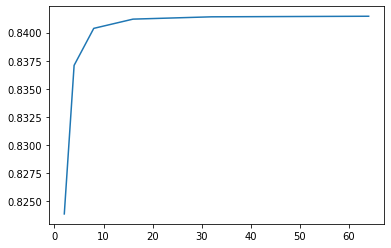

In [3]:
plt.plot(num_tri,solution)
plt.show()

In [4]:
def richardson_extrapolation(a, b, p):

    I = np.zeros((p, p))
    for k in range(0, p):
        # Composite trapezoidal rule for 2^k panels
        interval = 1 / (2**k)
        I[k, 0] = trap_integration(a, b, interval)

        # Recursive formula
        for j in range(0, k):
            I[k, j+1] = (4**(j+1) * I[k, j] - I[k-1, j]) / (4**(j+1) - 1)
            

        #print(I[k,0:k+1])   # display intermediate results

    return I    
        
    

In [5]:
%%time
m=5
I = richardson_extrapolation(0,1,m)
print(I)

[[0.77015115 0.         0.         0.         0.        ]
 [0.82386686 0.84177209 0.         0.         0.        ]
 [0.83708375 0.84148938 0.84147054 0.         0.        ]
 [0.84037503 0.84147213 0.84147098 0.84147098 0.        ]
 [0.84119705 0.84147106 0.84147098 0.84147098 0.84147098]]
CPU times: user 506 µs, sys: 1.04 ms, total: 1.55 ms
Wall time: 1.23 ms


In [6]:
ans = math.sin(1)
m = 1
val = []
while abs(ans) > 1e-18:
    ans = richardson_extrapolation(0,1,m) - math.sin(1)
    val.append(ans)
    m = m +1
print(m)
print(val)







ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()